## Lab 12: Cross Validation

### Due April 24 at 11:59 PM

In this lab, we will get more experience with features for linear models. We will fit several models to the data with different combinations of features. Using cross validation, we will compare them based on their out-of-sample accuracy. Throughout we will work with the scikit-learn package  

1. Fitting a model to data with linear regression 
1. Splitting into training set and testing set
1. Dividing the training set into folds for cross validation
 
We will study a dataset about housing prices in Massachusetts. By completing Lab 12 you will have a head start on Homework 5 about housing prices in Iowa.

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** at the top of this notebook.

Madi Perez

In [1]:
# import packages

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# set configuration

np.random.seed(47)

pd.options.display.max_rows = 20  
pd.options.display.max_columns = 15

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 16
plt.rcParams['figure.dpi'] = 150

# import additional packages for grading

import sys, os
from IPython.display import Image

In [2]:
# TEST 

assert 'pandas' in sys.modules and "pd" in locals()
assert 'numpy' in sys.modules and "np" in locals()
assert 'matplotlib' in sys.modules and "plt" in locals()
assert 'seaborn' in sys.modules and "sns" in locals()

assert np.random.get_state()[1][0] == 47

### Introduction

For this lab, we will use a dataset to predict the house prices in Boston. You can access the data in `boston_data.csv`.


The data contains these features:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 USD
    11. PTRATIO  pupil-teacher ratio by town
    12. LSTAT    % lower status of the population
    13. MEDV     Median value of owner-occupied homes in $1000's
    

In [3]:
path = "{home}/shared/{file}".format(home = os.environ["HOME"], file = "boston_data.csv")
boston = pd.read_csv(path)

boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


We want to predict the price of houses `MEDV` from the 12 features of the house. So the dependent variable is the housing price and the independent variables consist of `CRIM` through `LSTAT`. We want to explain the response in housing price to the features like crime rate of neighborhood and number of rooms in the building.

### Question 1 : Splitting between Training Set and Testing Set

Before we can fit a model to the data, we want to hold divide the table into two pieces. The training set will consist of 90% of the rows. We will fit the model to the training set. The testing set will consist of 10% of the rows.  We will evaluate the model on the testing set.

In [4]:
X = boston.drop(columns='MEDV')
Y = boston['MEDV']

RANDOM_STATE = 47  # use this random state for tests to work

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10, random_state = RANDOM_STATE) 

Remember that we sample at random from a population to avoid bias in the study. Similarly we want to split the table at random to avoid bias in the predicitions. 

However, we want to have reproducible findings meaning anyone can repeat the study. Since we need to have random numbers in the split between training set and testing set, we use a [random seed](https://en.wikipedia.org/wiki/Pseudorandom_number_generator). Think of a random seed as the ignition of a random number generator. 

Here we set the random seed to by 47. While we randomly split the table, we could call the function  [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to get the same training set and testing set

Note that we have four sets corresponding to variables 

- X_train 
- Y_train
- X_test 
- Y_test

How many rows and columns do we have in these sets?

In [15]:
Y_train.count()

455

In [16]:
number_rows_X_train, number_columns_X_train = X_train.shape[0], X_train.shape[1]
number_entries_Y_train = Y_train.count()

number_rows_X_test, number_columns_X_test = X_test.shape[0], X_test.shape[1]
number_entries_Y_test = Y_test.count()

# YOUR CODE HERE
#raise NotImplementedError()

In [17]:
# TEST

assert number_rows_X_train, number_columns_X_train == (455, 12)
assert number_entries_Y_test == (51,)


### Question 2 : Linear Regression

Before we investigate different combinations of features, we should fit a linear model to the training set to describe the relationship between the housing price and the housing features. 

We've imported `LinearRegression` from scikit-learn. We use the `fit` function on  `X_train` and `Y_train` to fit the model to the data.

In [21]:
# YOUR CODE HERE
model = LinearRegression().fit(X_train, Y_train)
#raise NotImplementedError()

Just like we use `fit` to fit the model to the data, we use `predict` to predict the response variable. Use `predict` to complete the calculation of the residuals.

In [22]:
Y_pred = model.predict(X_test)

# YOUR CODE HERE
#raise NotImplementedError()

residuals = Y_pred - Y_test

Having generated an array of residuals, we can compare predicted values and observed values on the testing set. We create a scatter-plot showing observed values and residuals.

Text(0.5, 0, 'Observed Ys')

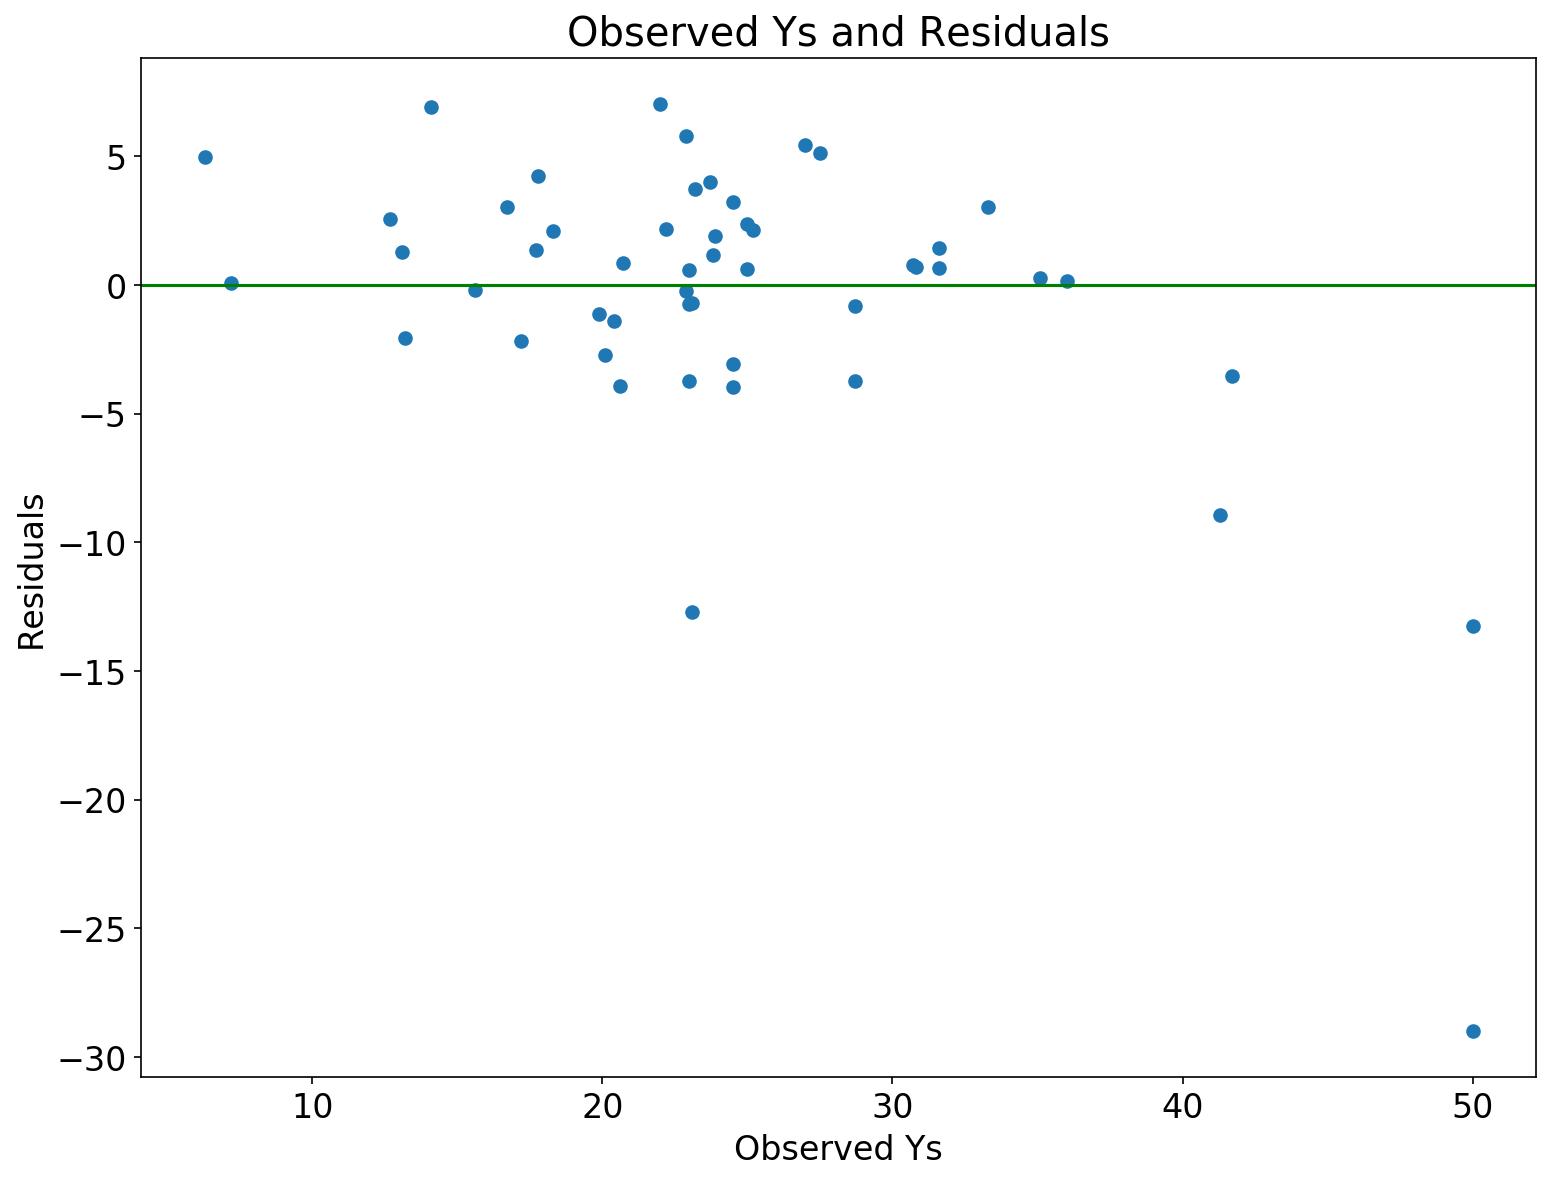

In [31]:
# YOUR CODE HERE
plt.scatter(Y_test, residuals)
plt.axhline(0, color = 'g')
plt.title("Observed Ys and Residuals")
plt.ylabel("Residuals")
plt.xlabel("Observed Ys")
#raise NotImplementedError()

True or False: The scatter-plot has outliers?

In [32]:
q2_answer = True

# YOUR CODE HERE
#raise NotImplementedError()

In [33]:
# TEST 

assert q2_answer in [True, False]


### Question 3 : Mean Square Error

We find that many of the residuals differ from 0. Remember that we can use the mean square error in linear regression to measure the difference between observed value and predicted value: 

$$
\textbf{MSE} = \frac{1}{n}\sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2 
$$

Fill out the function below and compute the MSE. The function should work for predictions on both the training data `X_train` and the test set `X_test`. Please avoid loops. Instead take advantag of `numpy`.


In [40]:
def mse(actual_y, predicted_y):
    """
    Input:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the observed values
        
    Output:
        The mean square error between the prediction and the observation
    """
    return np.mean((predicted_y - actual_y)**2)
    # YOUR CODE HERE
    #raise NotImplementedError()

Compute the mean square error on the testing set and the training set.

In [43]:
train_error = mse(Y_train, model.predict(X_train))
test_error =  mse(Y_test,model.predict(X_test))
print(train_error, test_error)
# YOUR CODE HERE
#raise NotImplementedError()

21.537115268405522 33.06448073516299


In [42]:
# TEST

assert np.isclose(test_error, 33.06, atol=0.01, rtol=0.01)


True or False: The mean square error on the testing set is higher than the mean square error on the training set?

In [44]:
q3_answer = True

# YOUR CODE HERE
#raise NotImplementedError()

In [45]:
# TEST 

assert q2_answer in [True, False]


### Question 4 : Cross Validation

Let's try building a simpler linear model with fewer features. While this may increase our training error, it may also decrease our test error and help prevent testing errors.

In the next section, we'll use $k$-fold cross-validation to select the best subset of features for our model. Recall the approach.

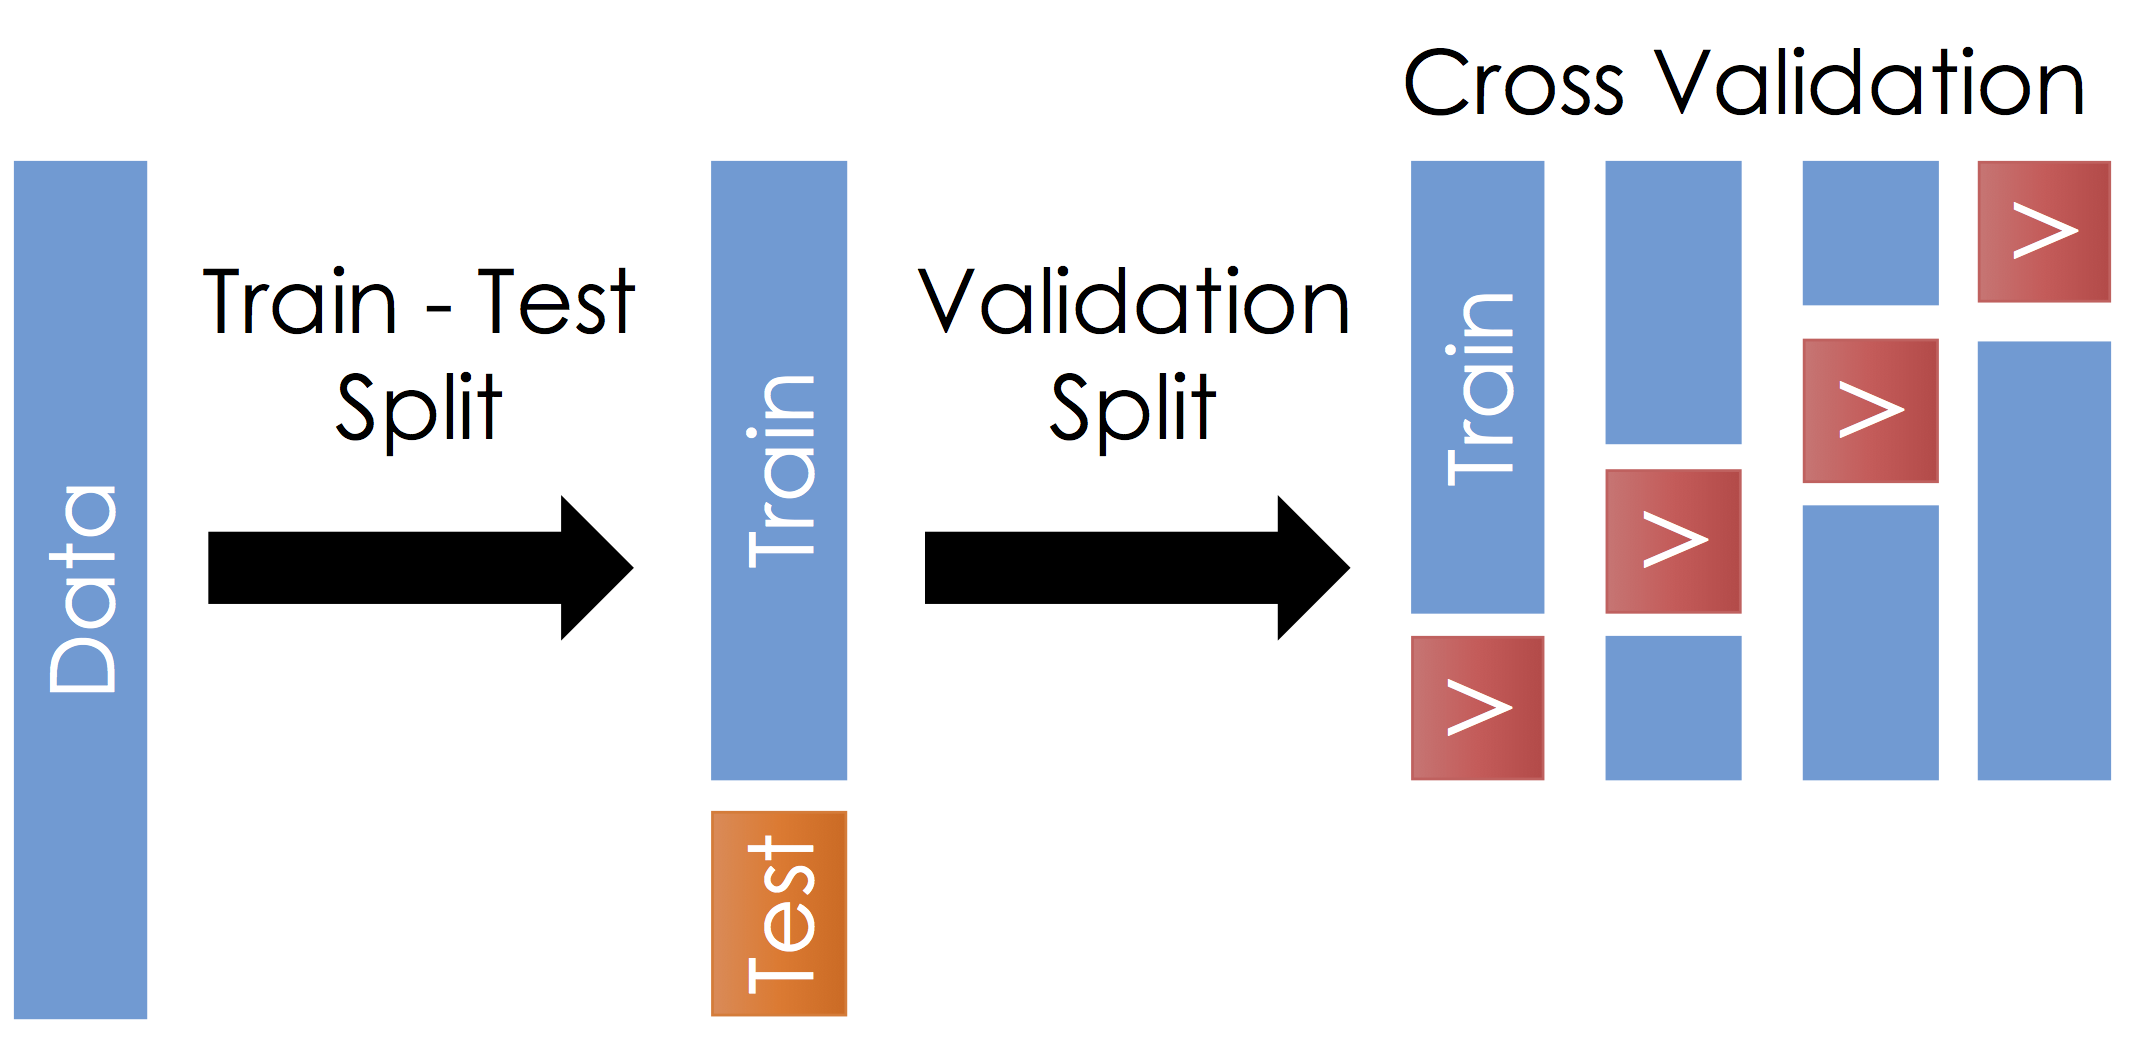

In [46]:
Image("cv.png")

We will use the scikit-learn implementation of $k$-fold cross validation. 

In [47]:
number_folds = 4
kf = KFold(n_splits=number_folds)

validation_errors = []
for train_indices, validation_indices in kf.split(X_train):
    split_X_train = X_train.iloc[train_indices, :]
    split_X_validation = X_train.iloc[validation_indices, :]

    split_Y_train = Y_train.iloc[train_indices]
    split_Y_validation = Y_train.iloc[validation_indices]

    linear_model = LinearRegression()
    linear_model.fit(split_X_train, split_Y_train)
    
    Y_prediction = linear_model.predict(split_X_validation)
    
    error = mse(split_Y_validation, Y_prediction)
    
    validation_errors.append(error)

Here we use 4 folds. The scikit-learn function `KFold` generates 4 pairs of indices. Each pair consists of the indices for the testing set and the validation set. We use the data for the testing set to fit the model. After we make a prediction on the validation set, we can compare observed values and predicted values with `mse` from Question 3. We have obtained 4 numbers.

In [48]:
print(validation_errors)

[25.74475258061389, 18.541889388347396, 22.10533336802044, 25.1693698826649]


Taking the average, we obtain the average mean square error across the 4 folds. Using the code above, write a function to compute the average mean square error for a model across folds of a training set.

1. Use the [`KFold.split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) function to get  folds from the training data. Note that `split` returns the indices of the data for that fold.
2. For each fold, select out the rows and columns based on the indices.
3. Compute the MSE on the validation split.
4. Return the average across all folds.

In [49]:
def compute_CV_error(model, X_train, Y_train, number_folds = 4):
    '''
    Split the training data into 4 subsets.
    For each subset, 
        fit a model holding out that subset
        compute the RMSE on that subset (the validation set)
    You should be fitting number_folds models total.
    Return the average MSE of these 4 folds.

    Args:
        model: an sklearn model with fit and predict functions 
        X_train (data_frame): Training data
        Y_train (data_frame): Label 

    Return:
        the average validation MSE for the 4 splits.
    '''
    kf = KFold(n_splits=number_folds)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        
        # split the data
        split_X_train, split_X_valid =  X_train.iloc[train_idx, :], X_train.iloc[valid_idx, :]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]

        # Fit the model on the training split
        model = model.fit(split_X_train, split_Y_train)
        
        # Compute the MSE on the validation split
        predicted_y = model.predict(split_X_valid)
        error = mse(split_Y_valid, predicted_y)

        # YOUR CODE HERE
        #raise NotImplementedError()

        validation_errors.append(error)
        
    return np.mean(validation_errors)

In [50]:
# TEST

avg = compute_CV_error(LinearRegression(), X_train[['TAX', 'INDUS', 'CRIM']],Y_train)

assert 55 < avg < 65


### Question 5 : Selection of Features

We have defined four collections of features. Each collection contains three features. 

For each collection, we use `compute_CV_error` from Question 4 to determine the average mean square error across 4 fold.

In [51]:
feature_sets = [['CRIM', 'ZN', 'INDUS'],
       ['CHAS', 'NOX', 'RM'],
       ['AGE', 'DIS', 'RAD'],
       ['TAX', 'PTRATIO', 'LSTAT']]

errors = []
for features in feature_sets:
    print("Trying features:", features)

    model = LinearRegression()

    avg = compute_CV_error(model, X_train[features],Y_train) 
    
    print("\tRMSE:", avg)
    errors.append(avg)

Trying features: ['CRIM', 'ZN', 'INDUS']
	RMSE: 58.93658756391542
Trying features: ['CHAS', 'NOX', 'RM']
	RMSE: 35.130987759235495
Trying features: ['AGE', 'DIS', 'RAD']
	RMSE: 66.68997644689036
Trying features: ['TAX', 'PTRATIO', 'LSTAT']
	RMSE: 34.92155446001403


Which collection of features was most accurate on average? Assign the collection of features to `best_feature_set`. Indicate the average mean squre error in `best_err`.


In [52]:
best_err = 34.92155446001403
best_feature_set = ['TAX', 'PTRATIO', 'LSTAT']

# YOUR CODE HERE
#raise NotImplementedError()

In [53]:
# TEST

assert best_feature_set in feature_sets


### Question 6 : Linear Regression

For the sake of comparison to Question 2 where we used linear regression with 12 features, we want to assess the accuracy of the model from Question 5. 

- Fit a model with the features from Question 5. 
- Predict housing prices for the training set and testing set. 
- Compute the mean square error on the training set and testing set 


In [55]:
model = LinearRegression()
model.fit(X_train[best_feature_set], Y_train)

train_mse = mse(Y_train , model.predict(X_train[best_feature_set]))
test_mse = mse(Y_test , model.predict(X_test[best_feature_set]))

# YOUR CODE HERE
#raise NotImplementedError()


In [56]:
# TEST

assert np.isclose(train_mse, 33.87581897458931, atol=0.01, rtol=0.01)


Here we hae generated a scatter-plot with the residuals. Remember that if points in the residual plot are randomly scattered around the line y = 0, then we know that a linear regression model has good performance. 

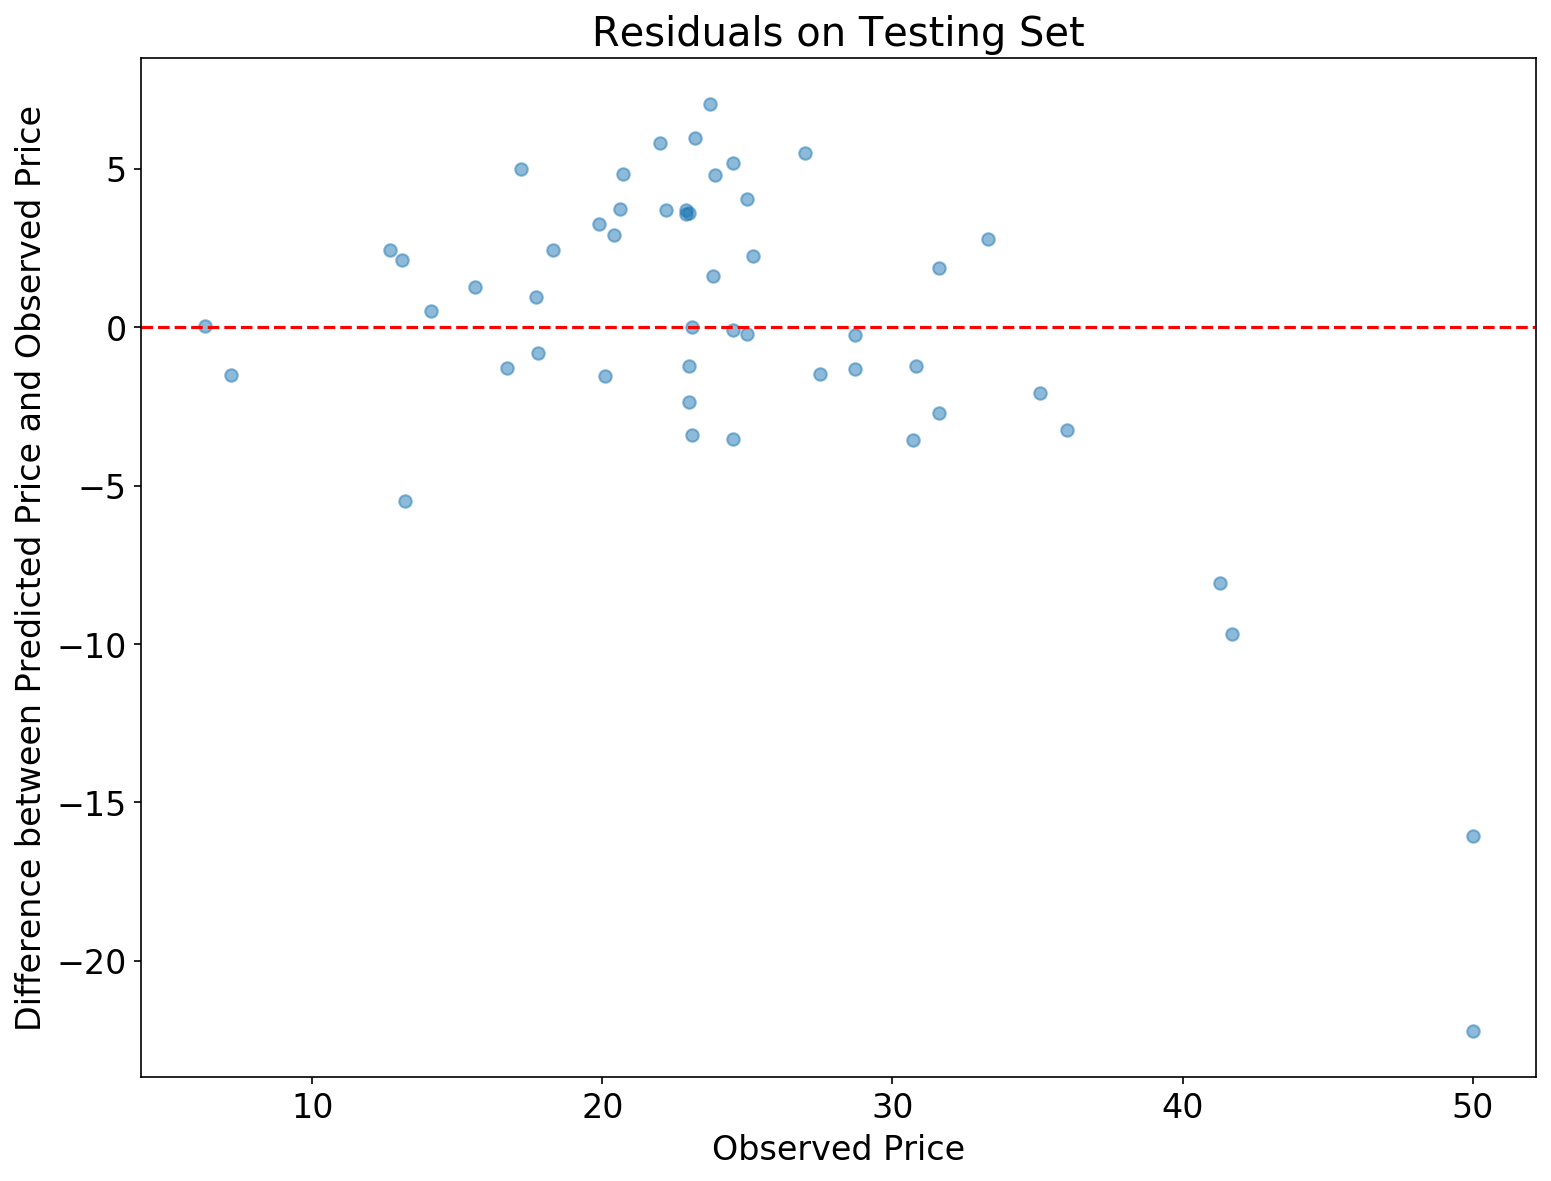

In [57]:
residuals = model.predict(X_test[best_feature_set]) - Y_test

plt.axhline(y = 0, color = "red", linestyle = "dashed")
plt.xlabel("Observed Price")
plt.ylabel("Difference between Predicted Price and Observed Price")
plt.title("Residuals on Testing Set")
plt.scatter(Y_test, residuals, alpha=0.5);

Nice! You've used $k$-fold cross-validation to fit a linear regression model to the housing data.

In the future, you'd probably want to use something like [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) to automatically perform cross-validation, but it's instructive to do it yourself at least once.